<a href="https://colab.research.google.com/github/duyguaran/graduation_thesis/blob/main/fruits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive #connected my drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import os  #created kaggle file on mydrive for connect kaggle 

#os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"

In [ ]:
#%cd /content/drive/MyDrive/kaggle


In [ ]:
#!kaggle datasets download -d   moltean/fruits #downloaded fruit data by using Copy API command  from kaggle 

In [ ]:
#unzipping the zip files and deleting the zip files
#!unzip \*.zip  && rm *.zip


In [3]:
import warnings 

In [4]:
warnings.filterwarnings('ignore')
from subprocess import check_output
print(check_output(["ls", "/content/drive/MyDrive/kaggle/fruits-360"]).decode("utf8"))

LICENSE
papers
readme.md
Test
test-multiple_fruits
Training



In [5]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
import cv2
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense



In [6]:
train = '/content/drive/MyDrive/kaggle/fruits-360/Training/'
test =  '/content/drive/MyDrive/kaggle/fruits-360/Test/'

In [15]:
fruits
fruits_image = []
import os 
for i in os.listdir(train):
    for image_filename in os.listdir(train + i):
        fruits.append(i) # name of the fruit 
        fruits_image.append(i + '/' + image_filename) # image of the fruit
# it takes about 1 min 

In [16]:
fruits_train = pd.DataFrame(fruits, columns=["Fruits Name"])
fruits_train["Fruits Image"] = fruits_image

In [19]:
from collections import Counter
newData = Counter(fruits_train["Fruits Name"])
common_fruits = newData.most_common(10)
print("The 10 most frequently found fruits in the data set and their number")
common_fruits

The 10 most frequently found fruits in the data set and their number


[('Grape Blue', 984),
 ('Plum 3', 900),
 ('Cherry 2', 738),
 ('Cherry Rainier', 738),
 ('Melon Piel de Sapo', 738),
 ('Peach 2', 738),
 ('Strawberry Wedge', 738),
 ('Tomato 1', 738),
 ('Tomato 3', 738),
 ('Walnut', 735)]

In [20]:
x,y = zip(*common_fruits)
x,y = list(x),list(y)

In [21]:
print(x)
print(y)

['Grape Blue', 'Plum 3', 'Cherry 2', 'Cherry Rainier', 'Melon Piel de Sapo', 'Peach 2', 'Strawberry Wedge', 'Tomato 1', 'Tomato 3', 'Walnut']
[984, 900, 738, 738, 738, 738, 738, 738, 738, 735]


In [24]:
print("The 10  most frequently found fruits in the dataset\n ", x)

The 10  most frequently found fruits in the dataset
  ['Grape Blue', 'Plum 3', 'Cherry 2', 'Cherry Rainier', 'Melon Piel de Sapo', 'Peach 2', 'Strawberry Wedge', 'Tomato 1', 'Tomato 3', 'Walnut']


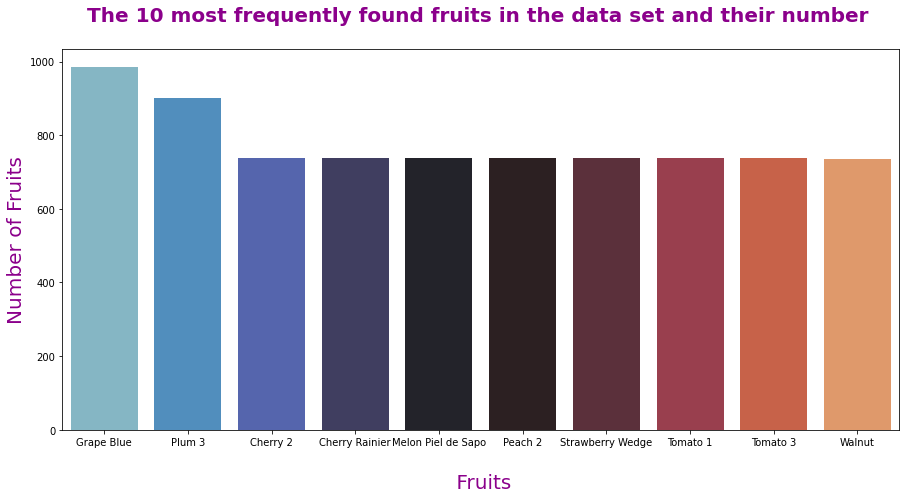

In [25]:
plt.figure(figsize=(15,7))
ax= sns.barplot(x=x, y=y, palette="icefire") 
plt.xlabel('\n Fruits',fontsize=20,color="darkmagenta") 
plt.ylabel('Number of Fruits',fontsize=20,color="darkmagenta")
plt.xticks(rotation = 0)
plt.title('The 10 most frequently found fruits in the data set and their number \n',color="darkmagenta",fontsize=20,fontweight = 'bold') 
plt.show()

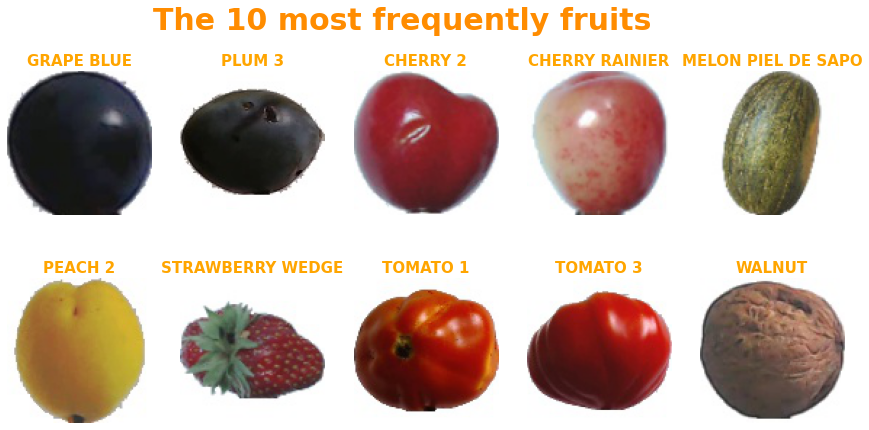

In [27]:
plt.figure(figsize=(15,7))
number_of_class = len(x)

for i in range(number_of_class):
    fruits = fruits_train[fruits_train["Fruits Name"] == x[i]]["Fruits Image"].values [1]
    
    plt.subplot(2,5,i+1)
    img = load_img(train + fruits)
    plt.imshow(img)
    plt.title(x[i].upper(), color = "orange", fontsize = 15 , fontweight = 600)
    plt.axis("off")

plt.suptitle("The 10 most frequently fruits  \n", fontsize = 30 , color = "darkorange", fontweight = 'bold')
plt.show()

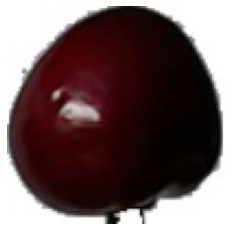

In [28]:
img= load_img(train + "Cherry 1/109_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()

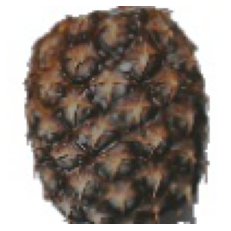

In [29]:
img_test = load_img(test + "Pineapple/144_100.jpg", target_size=(100,100))
plt.imshow(img_test)
plt.axis("off")
plt.show()

In [30]:
array_image = img_to_array(img)
print("Image Shape", array_image.shape)

Image Shape (100, 100, 3)


In [32]:
model = Sequential()
model.add(Conv2D(8, (3,3), input_shape= array_image.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(8, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class))
model.add(Activation("softmax"))

In [33]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

In [34]:
batch_size = 32

In [35]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                  shear_range = 0.3,
                  horizontal_flip=True,
                  vertical_flip=False,
                  zoom_range = 0.3
                  )
test_datagen  = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train,
                                                    target_size=array_image.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test,
                                                    target_size=array_image.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.
